In [22]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import nbimporter
from src import intensity_gradient
from src import Hysteresis

In [23]:
lena_gauss_max = np.array(Image.open('gauss-non-maximum_supression_lena.tiff'))[:,:,0]

In [38]:
kernel = np.array([-1, 0, 1])

swept_lena = np.zeros(lena_gauss_max.shape)

for i in range(1):
    print(i+1, ") t_low = (", 20*i, ", ", 200, "), t_high = (", 50, ", ", 250-20*i, ")")
    swept_lena = np.where(swept_lena == 0, 
                          Hysteresis.hysteresis(Hysteresis.double_threshold(lena_gauss_max, 50+(20*i), 100), kernel), 
                          swept_lena)
    swept_lena = np.where(swept_lena == 0, 
                          Hysteresis.hysteresis(Hysteresis.double_threshold(lena_gauss_max, 50, 250-(20*i)),kernel), 
                          swept_lena)

1 ) t_low = ( 0 ,  200 ), t_high = ( 50 ,  250 )


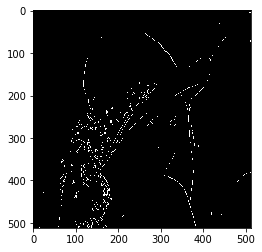

In [39]:
plt.gray()
plt.imshow(swept_lena)
plt.imsave("swept_lena_100.tiff", swept_lena)

In [26]:
def erosion(im):
    eroded = np.zeros(im.shape)
    
    for i in range(1, im.shape[0]-1):
        for j in range(1, im.shape[1]-1):
            #print(im[i-1:i+2, j-1:j+2] != 0)
            eroded[i, j] = np.all(im[i-1:i+2, j-1:j+2] != 0)
    return eroded

In [27]:
def dilation(im):
    dilated = np.zeros(im.shape)
    
    for i in range(1, im.shape[0]-1):
        for j in range(1, im.shape[1]-1):
            dilated[i-1:i+2, j-1:j+2] = np.any(im[i-1:i+2, j-1:j+2] != 0)
    return dilated

In [28]:
def opening(im):
    return dilation(erosion(im))

In [29]:
def closing(im):
    return erosion(dilation(im))

In [30]:
swept_lena = np.array(Image.open('swept_lena_100.tiff'))[:,:,0]

In [40]:
eroded_100 = erosion(swept_lena)
dilated_100 = dilation(swept_lena)
opened_100 = opening(swept_lena)
closed_100 = closing(swept_lena)

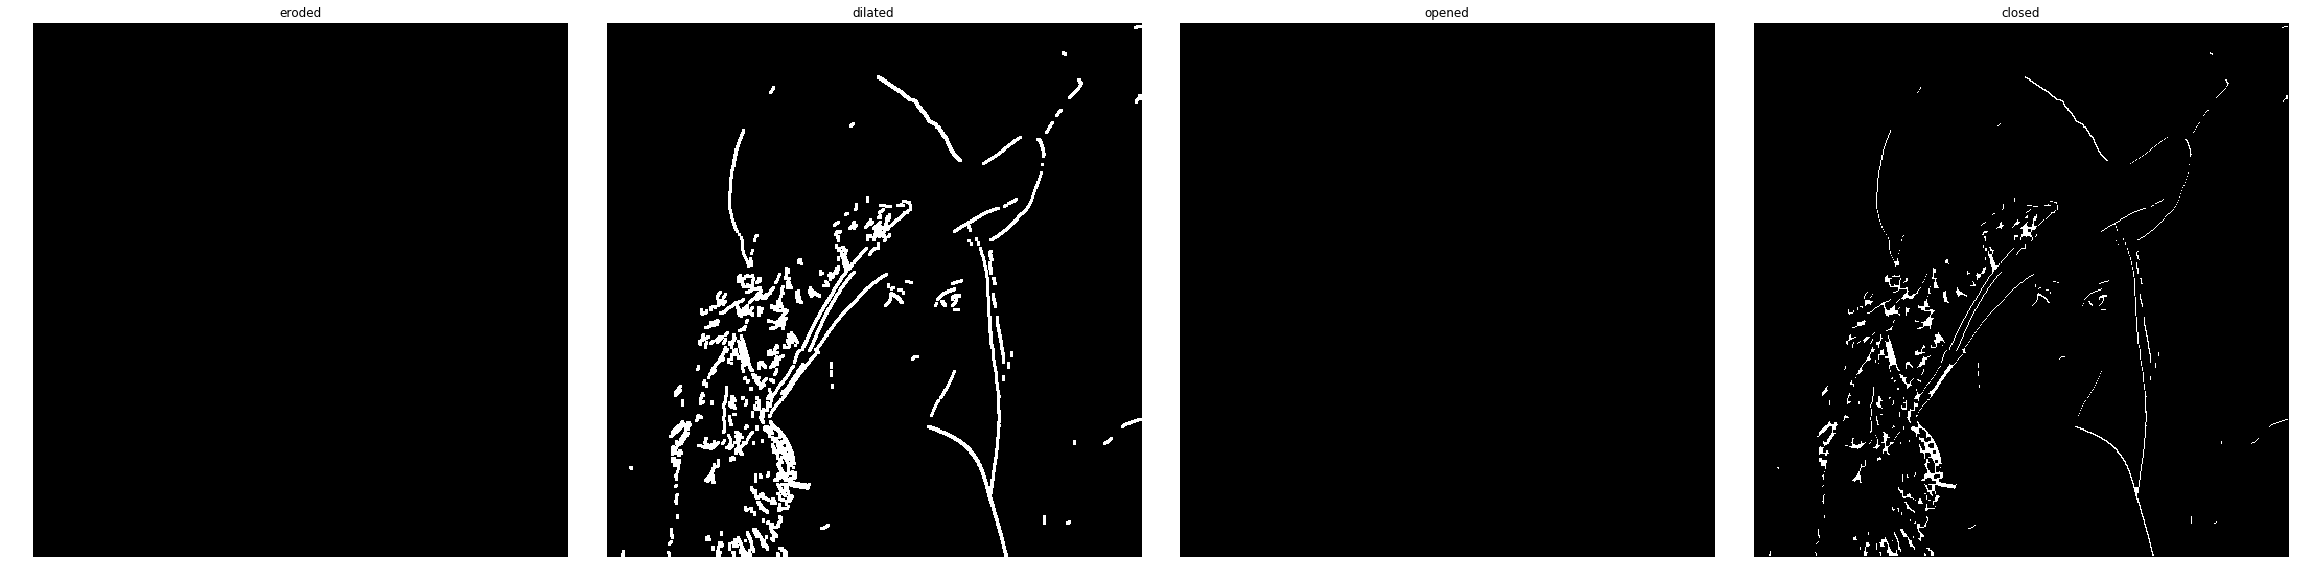

In [41]:
morphed_100 = [eroded_100, dilated_100, opened_100, closed_100]
titles = ["eroded", "dilated", "opened", "closed"]
fig, ax = plt.subplots(1, 4, figsize=(32,8))
plt.gray()
for i, axi in enumerate(ax.flat):
    axi.imshow(morphed_100[i])
    axi.set_title(titles[i])
    axi.set_axis_off()

plt.tight_layout(True)
plt.show()

In [33]:
def choose_method(im, n = random.randint(0,4)):
    if n == 0:
        return erosion(im)
    elif n==1:
        return dilation(im)
    elif n==2:
        return opening(im)
    elif n==3:
        return closing(im)

In [34]:
res_lena = np.copy(swept_lena)

size = 10
n_array = np.random.randint(0,4, size)
n_array = np.array([1,1,0,3,3])
size = n_array.shape[0]

for i in range(size):
    print(titles[n_array[i]])
    res_lena = choose_method(res_lena, n_array[i])


dilated
dilated
eroded
closed
closed


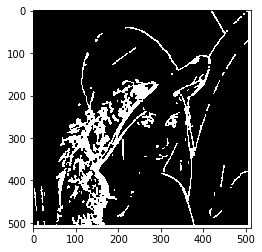

In [35]:
plt.imshow(res_lena)